<a href="https://colab.research.google.com/github/IvanGomez37/Final-Project-FoML/blob/main/seoul_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing, Initializing the .csv via Drive**

In [152]:
''' Unncoment if working in VSC
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
'''

' Unncoment if working in VSC\n# libraries for the files in google drive\nfrom pydrive.auth import GoogleAuth\nfrom google.colab import drive\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n'

In [153]:
''' Unncoment if working in VSC
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1Px7HKM8lKoaLgMnMDPGkrQWVdfODCOmt'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('SeoulBikeData.csv')
df = pd.read_csv("SeoulBikeData.csv", encoding='latin-1')
'''

' Unncoment if working in VSC\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\nfile_id = \'1Px7HKM8lKoaLgMnMDPGkrQWVdfODCOmt\'\ndownload = drive.CreateFile({\'id\': file_id})\ndownload.GetContentFile(\'SeoulBikeData.csv\')\ndf = pd.read_csv("SeoulBikeData.csv", encoding=\'latin-1\')\n'

# **Setting up the dataset**

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [155]:
# Reading csv file
SeoulBikeData = pd.read_csv('./SeoulBikeData.csv', encoding='latin-1') # Comment if working in Colab

## Initial data basic information

In [156]:
# Dataframe top rows
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [157]:
# Printing basic data info
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Object data type transformation

*We need to convert the object parameters to integer parameters*


In [158]:
# Factorizing object data type columns: Seasons, Holiday, Fuctioning Day
SeoulBikeData['Seasons'] = pd.factorize(SeoulBikeData['Seasons'])[0]
SeoulBikeData['Holiday'] = pd.factorize(SeoulBikeData['Holiday'])[0]
SeoulBikeData['Functioning Day'] = pd.factorize(SeoulBikeData['Functioning Day'])[0]

*For the Date parameter we need to use a different way to convert the object to a integer due to the information it has.*



In [159]:
# Transforming Date string to datetime data type
SeoulBikeData['Date'] = pd.to_datetime(SeoulBikeData['Date'], format='%d/%m/%Y')

In [160]:
# Printing transformed data
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0


In [161]:
# Updated data types
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   int64         
 12  Holida

# **Exploring the dataset**


## Initial description

In [162]:
# Brief data statistical summary
SeoulBikeData.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.504110,0.049315,0.033676
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,1.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404


## Separation of data features and target values

In [163]:
# Obtaining target values column
SeoulBikeData_target = SeoulBikeData["Rented Bike Count"]

# Obtaining features dataframe
SeoulBikeData_features = SeoulBikeData.drop(columns=["Rented Bike Count"])

# Lists for feature type
discrete_features = ['Date','Hour','Seasons', 'Holiday', 'Functioning Day']
continuous_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

## Feature understanding

### Discrete features barplot

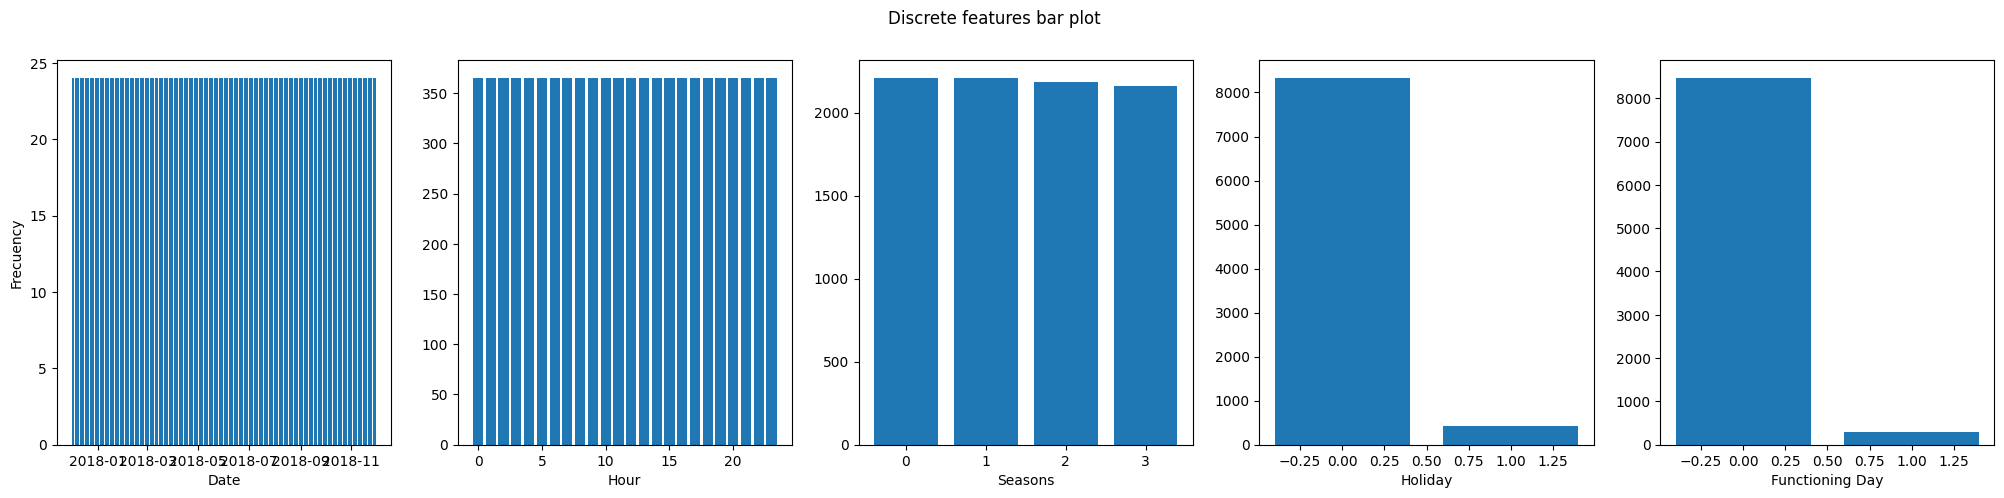

In [164]:
# Function to generate barplot
def discrete_features_barplot(data, data_cols):
    # Number of features
    num_col = len(data_cols)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data_cols):
        axs[i].bar(data[data_col].unique(), data[data_col].value_counts())

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        axs[i].set_xlabel(data_col)
        
    return fig

# Plotting barplot
discrete_barplot = discrete_features_barplot(SeoulBikeData, discrete_features)
plt.suptitle("Discrete features bar plot")
plt.show()

### Continuous features histogram

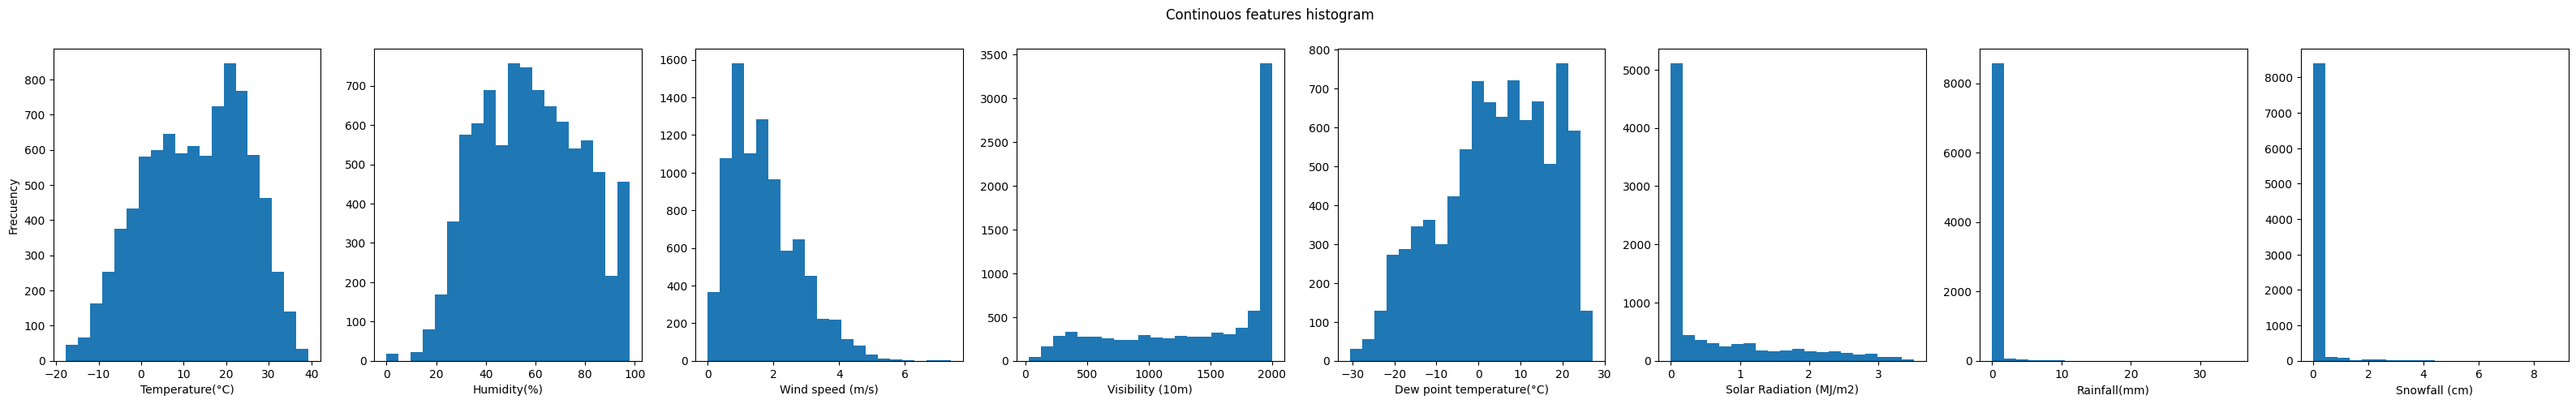

In [165]:
# Function to generate histogram
def continous_features_histogram(data, data_cols, n_bins):
    # Number of features
    num_col = len(data_cols)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data_cols):
        axs[i].hist(data[data_col], bins = n_bins)

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        axs[i].set_xlabel(data_col)
        
    return fig

# Plotting histogram
continuous_histogram = continous_features_histogram(SeoulBikeData, continuous_features, 20)
plt.suptitle("Continouos features histogram")
plt.show()

### KDE plot

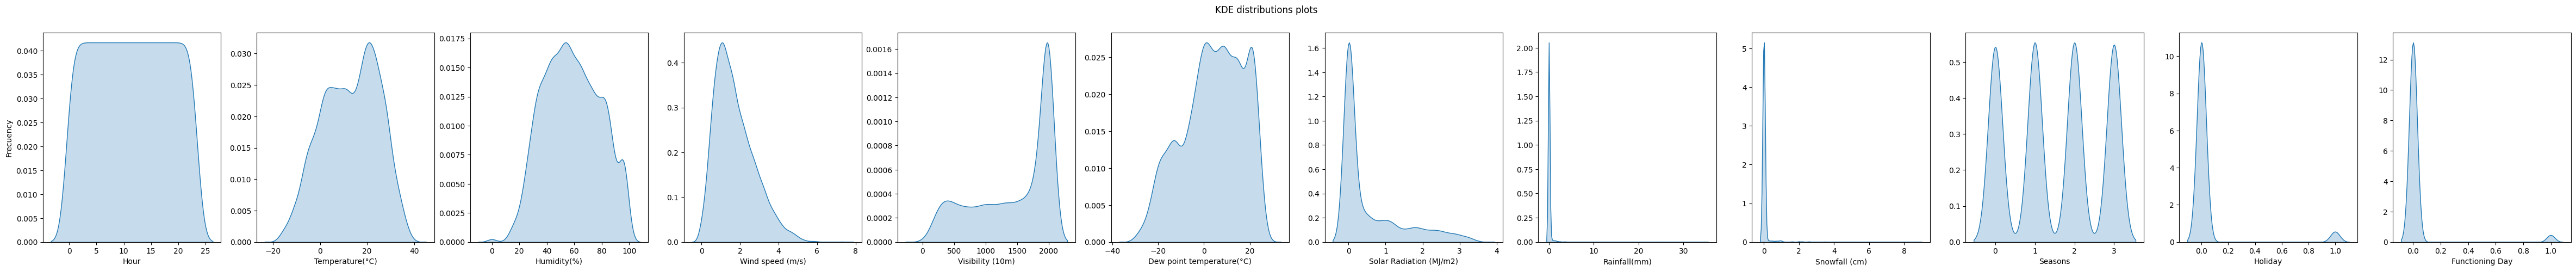

In [166]:
# To surpress annoying warnings
import warnings

# Function to generate KDE plots
def kde_plot(data):
    # Dropping Date column because of unssuported data type
    data = data.drop(["Date"], axis=1)

    # Number of features
    num_col = data.shape[1]

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data.columns):
        warnings.filterwarnings('ignore')
        if(data_col != "Date"):
            sns.kdeplot(data[data_col], ax=axs[i], fill = True)

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        else: axs[i].set_ylabel("")
        axs[i].set_xlabel(data_col)
        
    return fig

# Plotting Kde
kde_plotted = kde_plot(SeoulBikeData_features)
plt.suptitle("KDE distributions plots")
plt.show()

## Feature Relationships

### Data correlation matrix

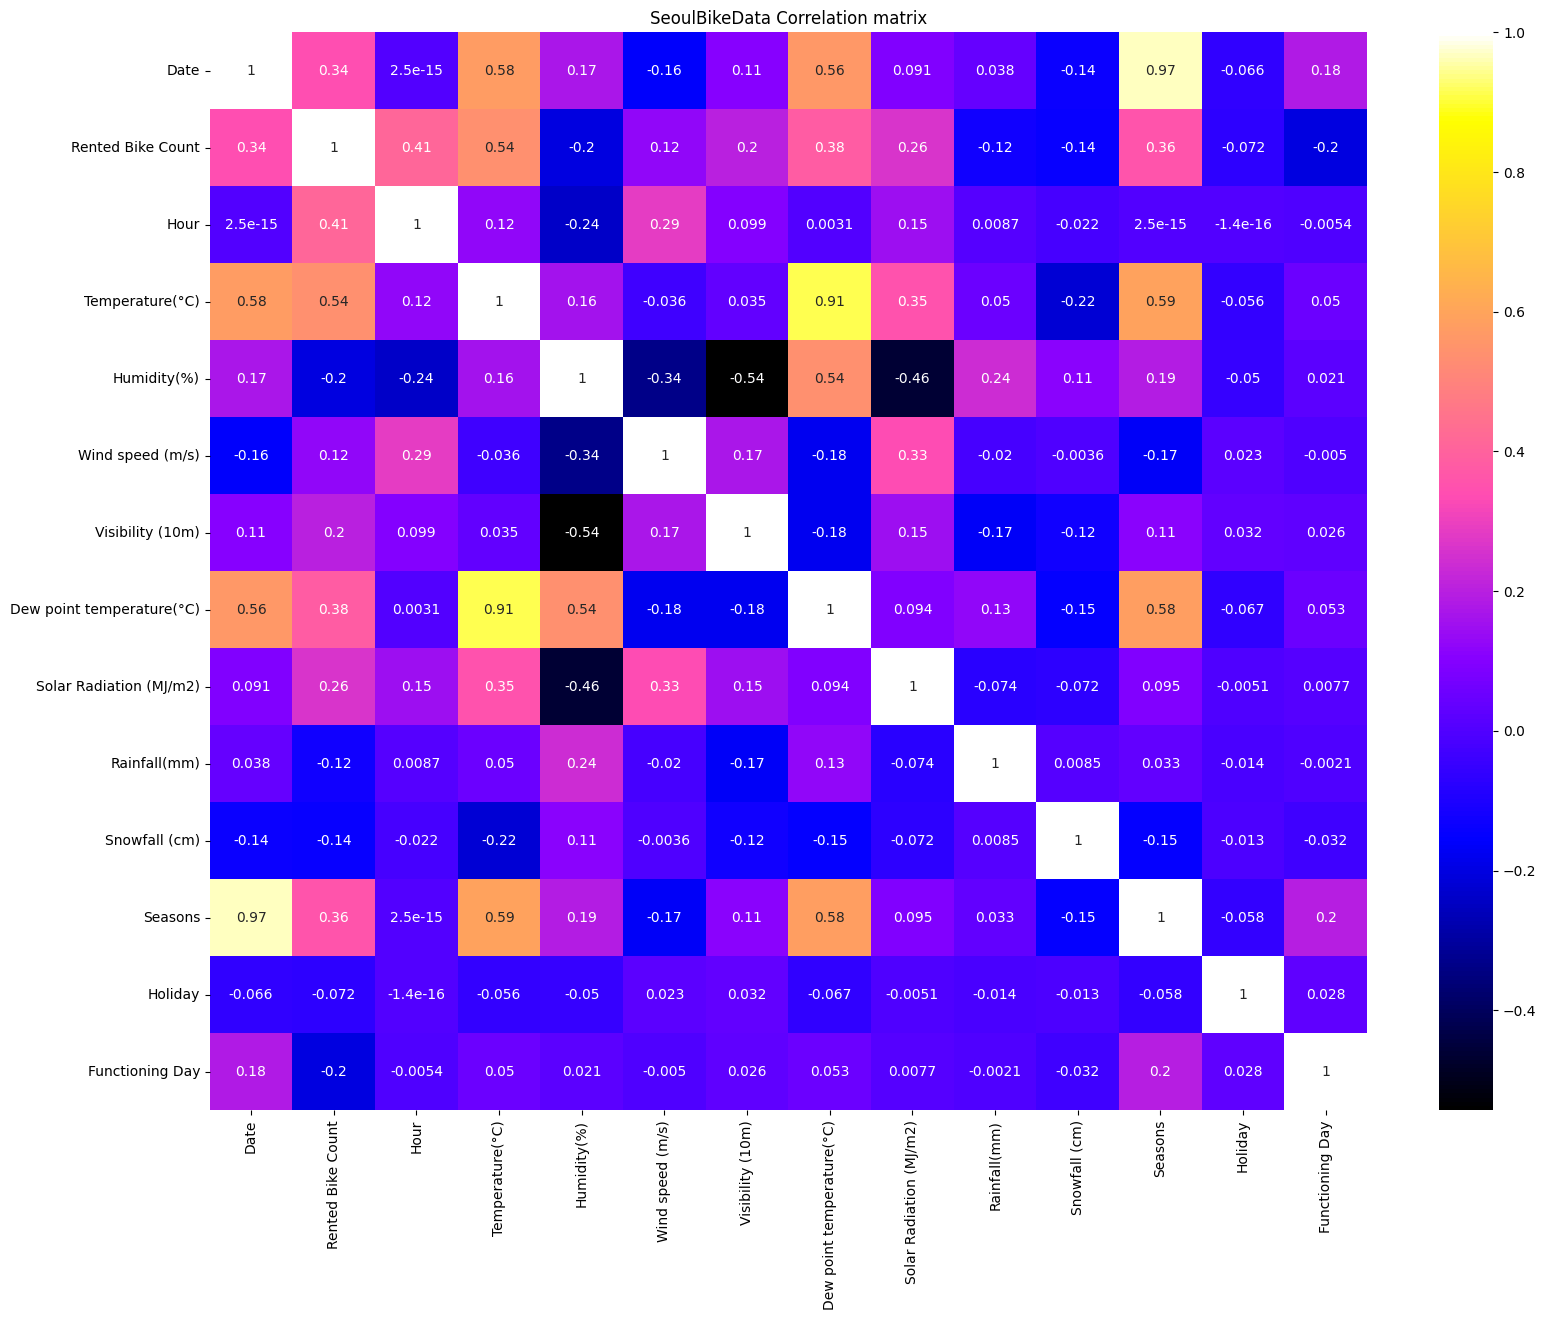

In [167]:
# Generating Correlation matrix of SeoulBikeData
correlation_matrix = SeoulBikeData.corr()

# Plotting Correlation matrix
num_rows, num_cols = SeoulBikeData.shape
plt.figure(figsize=(num_cols + (num_cols / 3), num_cols))
plt.title("SeoulBikeData Correlation matrix")
ax = sns.heatmap(correlation_matrix, annot = True, cmap= 'gnuplot2')
plt.show()

### Features scatterplot matrix

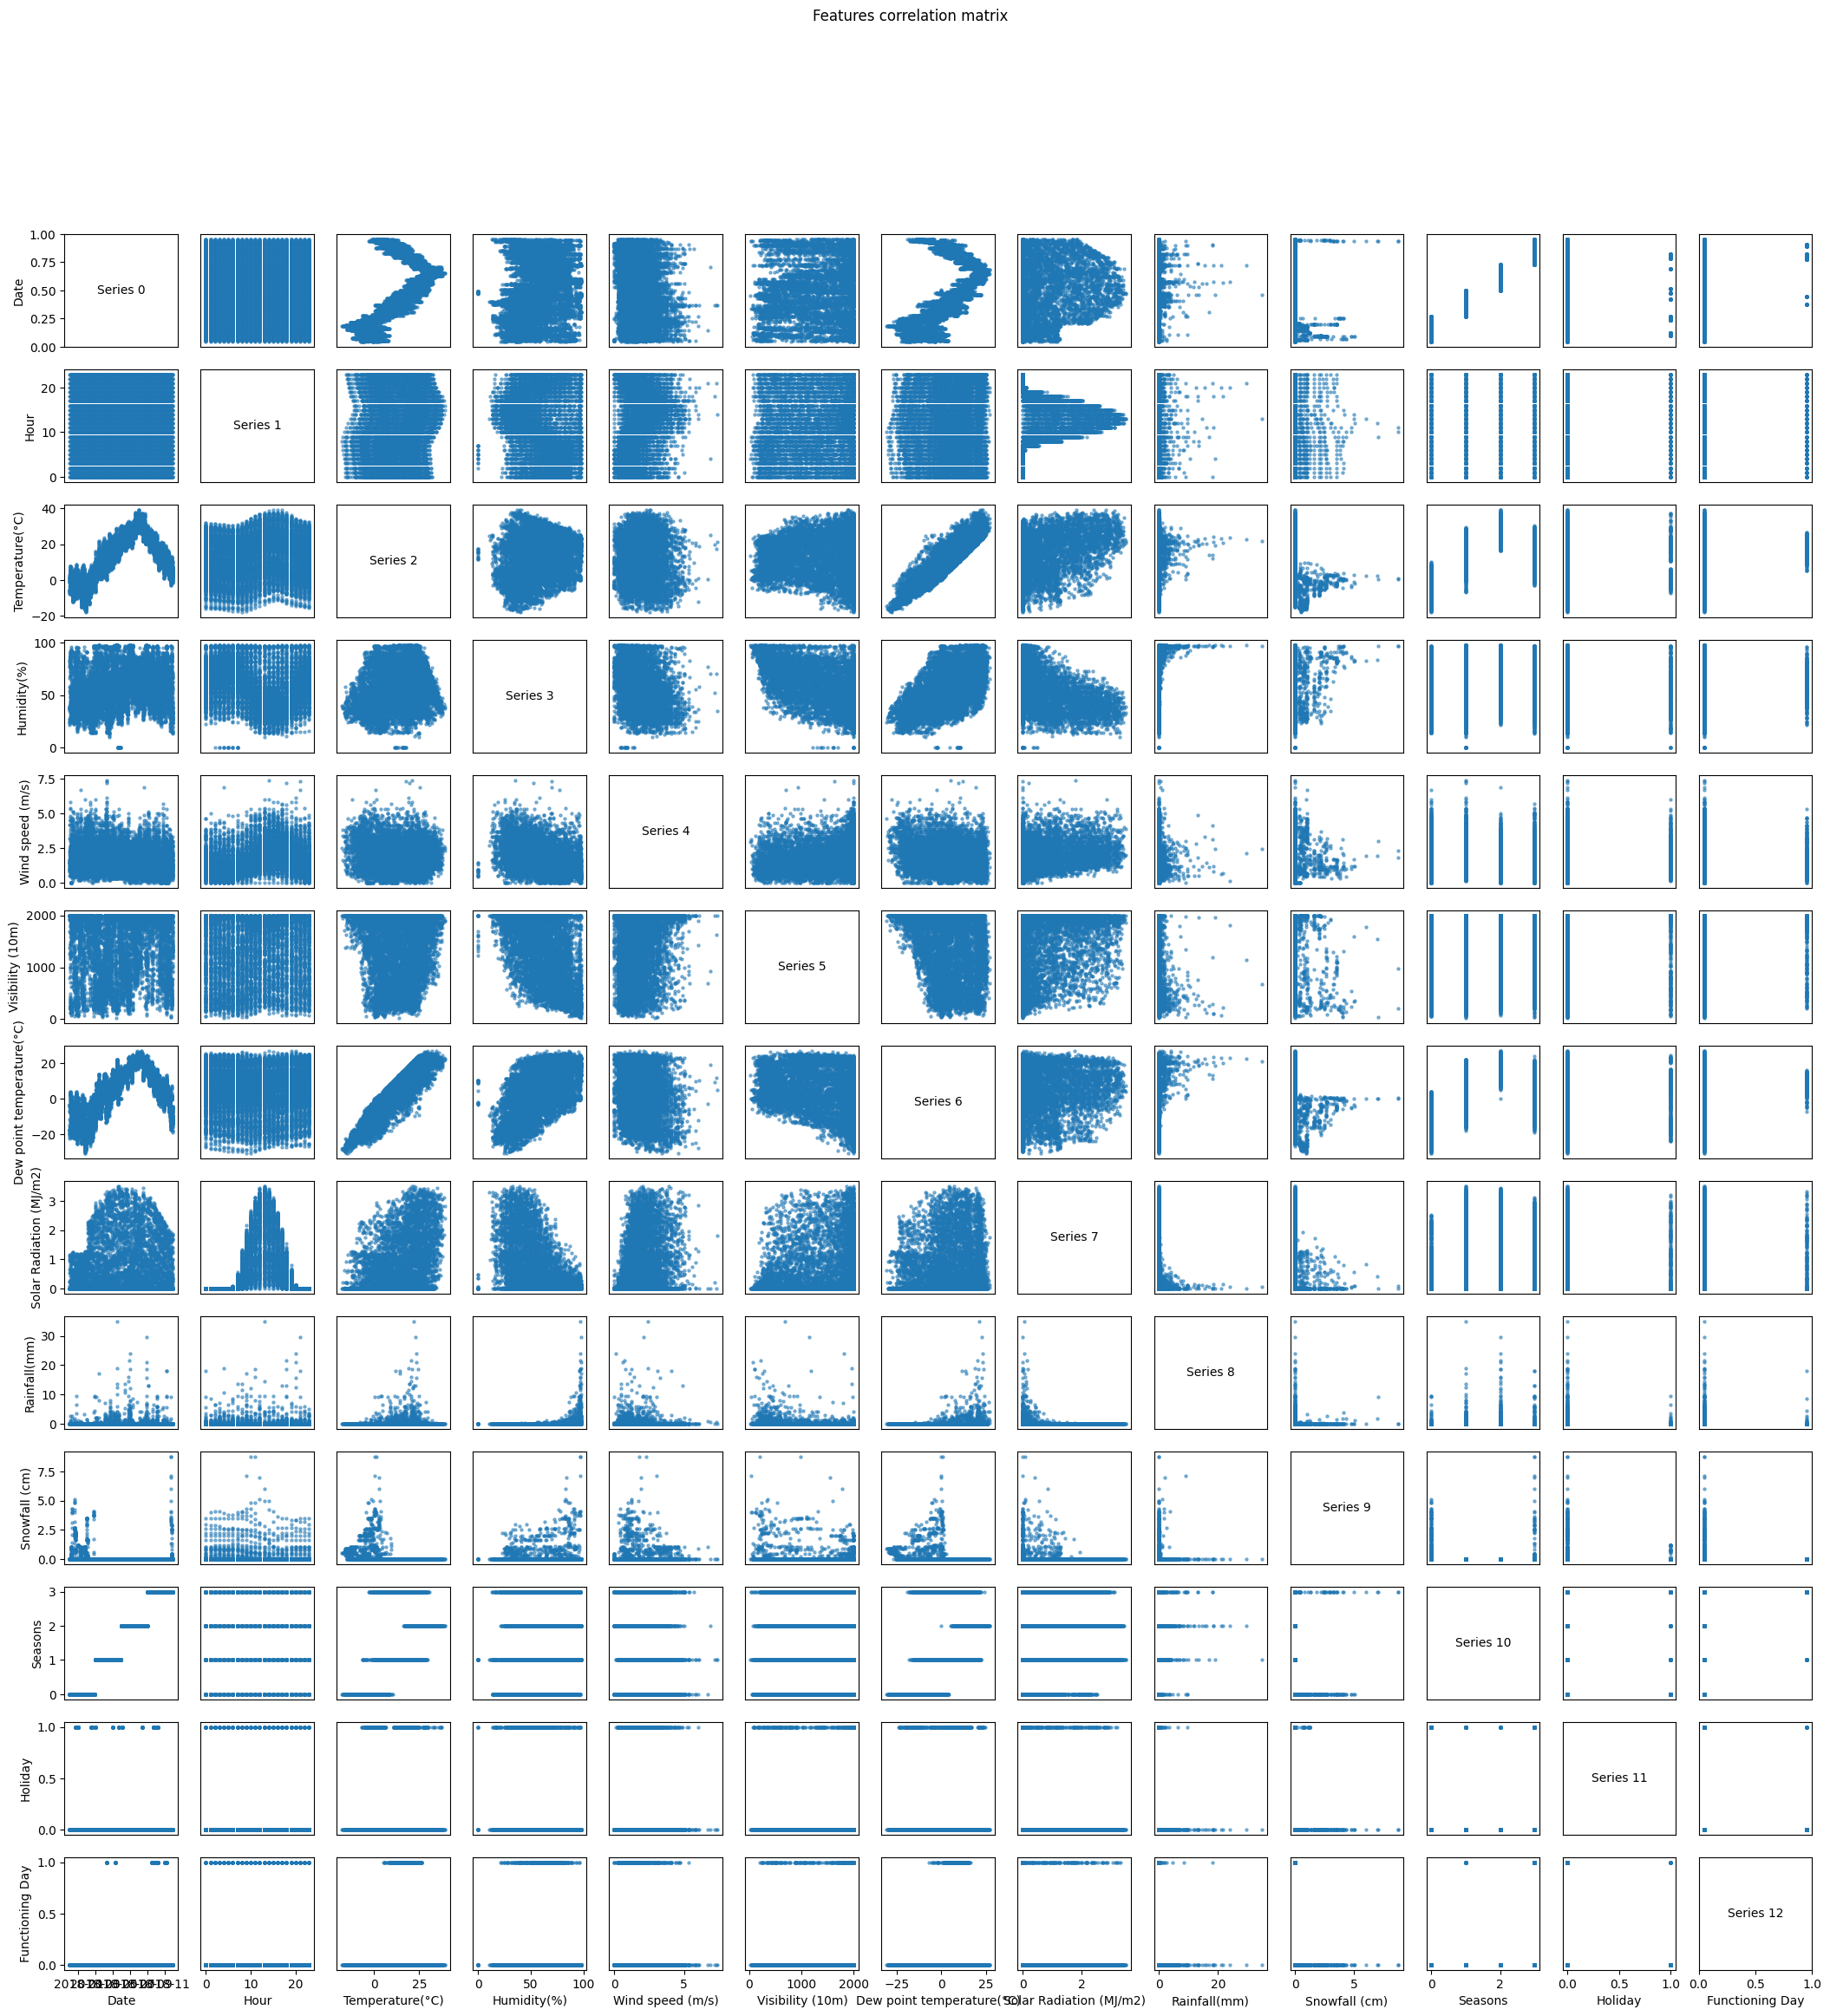

In [168]:
# Function to generate scatterplot matrix
def scatterplot_matrix(data):
    num_col = data.shape[1]

    fig, axs = plt.subplots(num_col, num_col, figsize=(num_col * 2, num_col * 2))
    
    for i, col_name_i in zip(range(num_col), data.columns):
        for j, col_name_j in zip(range(num_col), data.columns):
            # Either plot scatter or print number of serie
            if i != j: axs[i, j].scatter(data[col_name_j], data[col_name_i], s = 5, alpha=0.5)
            else: axs[i, j].annotate(f"Series {i}", (0.5, 0.5), xycoords='axes fraction', ha="center", va="center")

            # Setting rows and columns shared labels
            if j == 0: axs[i, j].set_ylabel(col_name_i)
            if i == num_col - 1: axs[i, j].set_xlabel(col_name_j)

            # Hide axis labels except for left and bottom charts
            if i < num_col - 1: axs[i][j].xaxis.set_visible(False)
            if j > 0: axs[i][j].yaxis.set_visible(False)

    return fig

# Plotting scatterplot matrix
scatter_matrix = scatterplot_matrix(SeoulBikeData_features)
plt.suptitle("Features correlation matrix")
plt.show()

### Features vs Target value (Rented Bike Count) relation

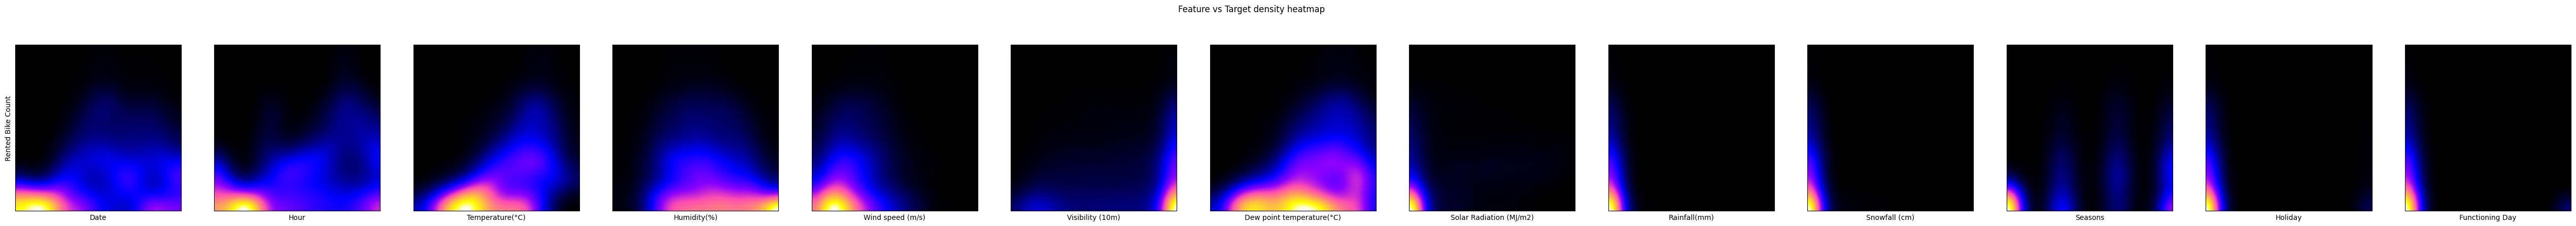

In [169]:
from scipy.ndimage import gaussian_filter

# Function to generate heatmaps of features vs target
def features_target_plot(data_features, data_target, s, bins = 1000):
    # Number of features
    num_col = data_features.shape[1]

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, col_name_i in zip(range(num_col), data_features.columns):
        # Heatmap plotting
        heatmap, x, y = np.histogram2d(data_features[col_name_i], data_target, bins = bins)
        heatmap = gaussian_filter(heatmap, sigma = s)
        axs[i].imshow(heatmap.T, origin='lower', cmap = 'gnuplot2')
        axs[i].axes.yaxis.set_ticks([])
        axs[i].axes.xaxis.set_ticks([])

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel(data_target.name)
        axs[i].set_xlabel(col_name_i)
    return fig

# Plotting features vs target heatmaps
features_target = features_target_plot(SeoulBikeData_features, SeoulBikeData_target, 64)
plt.suptitle("Feature vs Target density heatmap")
plt.show()